# Introduction

The dataset utilized is the Family Income and Expenditure Survey 2012 Vol 1.

# Dataset

The Family Income and Expenditure Survey (FIES) 2012 is a national survey conducted by the Philippine Statistics Authority (PSA) to gather comprehensive data on family income and spending patterns across households in the Philippines. The dataset provides insights into income distribution, expenditure habits, and economic well-being, helping policymakers, researchers, and analysts assess poverty levels, economic growth, and financial behavior among Filipino households.

# Python Libaries and Modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Cleaning

The data was preprocessed and cleaned through these methods in order:

**1.) Standardizing Column Names**
- Column names were stripped of whitespace, converted to uppercase, and spaces were replaced with underscores to ensure consistency and avoid potential errors when referencing column names in code.

**2.) Handling Missing Values**
- Columns with more than 50% missing values were dropped.
For numerical columns, missing values were filled with the median of the respective column.
For categorical columns, missing values were filled with the mode (most frequent value).
- Dropping columns with excessive missing values prevents misleading analysis.
Using the median for numerical data avoids the influence of outliers.
Using the mode for categorical data preserves the most common category.
- Asset ownership features that did not have any input were assumed to have a value of 0 (meaning they do not own that item).

**3.) Removing Duplicates**
- Duplicate rows were removed as they could distort results and introduce bias.

**4.) Converting Data Types**
- Categorical columns (e.g., region, employment status, household type) were converted to category type.
Income and expenditure columns were converted to float.
- Converting numerical columns to float ensures compatibility with mathematical operations whilst categorical columns were converted to category type for easier referencing.

**5.) Handling Outliers**
- The Interquartile Range (IQR) method was used to cap extreme values:
Values below Q1 - 1.5 * IQR were replaced with the lower bound.
Values above Q3 + 1.5 * IQR were replaced with the upper bound.
- Outliers can distort statistical analysis and machine learning models.
The IQR method retains the distribution's general shape while reducing the influence of extreme values.

In [103]:
incexp_df = pd.read_csv("FIES_2012_Cleaned.csv")
import pandas as pd
import numpy as np



# List of numeric columns
numeric_columns = ['W_SHSN', 'NATDC', 'HSE_ALTERTN', 'PSU', 'REGPC', 'T_ACTRENT',
                   'T_BIMPUTED_RENT', 'T_RENTVAL', 'BLDG_TYPE', 'RFACT', 'FSIZE', 'WALLS',
                   'BWEIGHT', 'AGRI_SAL', 'RSTR', 'NONAGRI_SAL', 'T_IMPUTED_RENT', 'AGE',
                   'T_FOOD_NEC', 'MEMBERS', 'NATPC', 'ROOF', 'FOOD_ACCOM_SRVC', 'W_HCN',
                   'POP_ADJ', 'SPOUSE_EMP', 'REGDC', 'HGC']

income_expenditure_columns = [
    "WAGES", "NETSHARE", "CASH_ABROAD", "CASH_DOMESTIC", "RENTALS_REC", "INTEREST", "PENSION", "DIVIDENDS",
    "OTHER_SOURCE", "NET_RECEIPT", "REGFT", "NET_CFG", "NET_LPR", "NET_FISH", "NET_FOR", "NET_RET", "NET_MFG",
    "NET_COM", "NET_TRANS", "NET_MIN", "NET_CONS", "NET_NEC", "EAINC", "TOINC", "LOSSES", "T_BREAD", "T_MEAT",
    "T_FISH", "T_MILK", "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_COFFEE", "T_MINERAL", "T_ALCOHOL", "T_TOBACCO",
    "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", "T_FOOD", "T_CLOTH", "T_FURNISHING", "T_HEALTH", "T_HOUSING_WATER",
    "T_TRANSPORT", "T_COMMUNICATION", "T_RECREATION", "T_EDUCATION", "T_MISCELLANEOUS", "T_OTHER_EXPENDITURE",
    "T_OTHER_DISBURSEMENT", "T_NFOOD", "T_TOTEX", "T_TOTDIS", "T_OTHREC", "T_TOREC", "PCINC"
]

# Combine both lists
all_columns = numeric_columns + income_expenditure_columns

# Outlier handling function using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier handling function to the selected columns
for col in all_columns:
    if col in incexp_df.columns:
        incexp_df = handle_outliers(incexp_df, col)


# Exploratory Data Analysis



Sanity check if there are missing values left in the cleaned dataset file

In [17]:


missing_values = incexp_df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
# Get data types of each column
data_types = incexp_df.dtypes

# Display columns with missing values along with their data types
missing_data_info = pd.DataFrame({
    "Missing Values": missing_values[missing_values > 0],
    "Data Type": data_types[missing_values > 0]
})

print("Columns with Missing Values and Their Data Types:\n")
print(missing_data_info)

Missing values per column:
 Series([], dtype: int64)
Columns with Missing Values and Their Data Types:

Empty DataFrame
Columns: [Missing Values, Data Type]
Index: []


In [18]:
# Get unique values for columns with missing values
missing_columns = missing_values[missing_values > 0].index
unique_values = {col: incexp_df[col].dropna().unique() for col in missing_columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values[:10]}")  # Display only first 10 unique values for readability
    print("-" * 50)

In [19]:
# Assuming df is your DataFrame
unique_values = incexp_df['CW'].unique()

# Print the unique values
print(unique_values)

[0. 3. 4. 1. 2. 7. 6. 5.]


## Display Dataset/Table Information
In order to familiarize ourselves with out dataset, we first display the info of our dataset using the `.info()` function. Here we can see the number of rows and columns and the variable type of each feature.

In [21]:
# prints the info on the dataset
incexp_df.info()

# prints the rows and columns of the dataset
print("\nRows and columns of the Dataset:")
print(incexp_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(78), int64(41)
memory usage: 36.5 MB

Rows and columns of the Dataset:
(40171, 119)


## Using `.head()` and `.tail()` function
We use the head and tail function to see what are the first values and the last value of the dataset. This is to give an idea on what kind of values we are working with.

In [23]:
incexp_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2,25,2,21100,415052,138.25,200.6576,3.0,...,1.0,1.0,0.0,0.0,0.946172,11.593749,9,8,8,9
1,14,101001000,3,43,2,21100,415052,138.25,200.6576,12.5,...,0.0,1.0,0.0,1.0,0.946172,10.329820,5,9,9,4
2,14,101001000,4,62,2,21100,415052,138.25,200.6576,2.0,...,0.0,1.0,0.0,0.0,0.946172,11.373589,9,6,6,8
3,14,101001000,5,79,2,21100,415052,138.25,200.6576,4.0,...,0.0,1.0,0.0,0.0,0.946172,10.676526,6,6,6,6
4,14,101001000,10,165,2,21100,415052,138.25,200.6576,5.0,...,0.0,0.0,0.0,1.0,0.946172,10.531637,6,6,6,5


In [24]:
incexp_df.tail()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
40166,12,9804029001,18,568,1,22000,114062,271.25,963.2264,5.0,...,0.0,0.0,0.0,0.0,0.902863,10.312367,5,5,7,7
40167,12,9804035000,1,25,2,22000,414067,271.25,588.6253,9.0,...,0.0,1.0,0.0,0.0,0.902863,9.572890,1,5,7,3
40168,12,9804035000,2,51,2,22000,414067,271.25,588.6253,6.0,...,0.0,0.0,0.0,0.0,0.902863,9.859448,3,4,6,4
40169,12,9804035000,3,75,2,22000,414067,271.25,588.6253,5.0,...,0.0,1.0,0.0,0.0,0.902863,10.341291,5,6,7,7
40170,12,9804035000,4,102,2,22000,414067,271.25,588.6253,7.0,...,0.0,0.0,0.0,0.0,0.902863,9.663897,2,4,6,3


In [25]:
print(incexp_df.dtypes)

W_REGN      int64
W_OID       int64
W_SHSN      int64
W_HCN       int64
URB         int64
           ...   
PCINC     float64
NATPC       int64
NATDC       int64
REGDC       int64
REGPC       int64
Length: 119, dtype: object


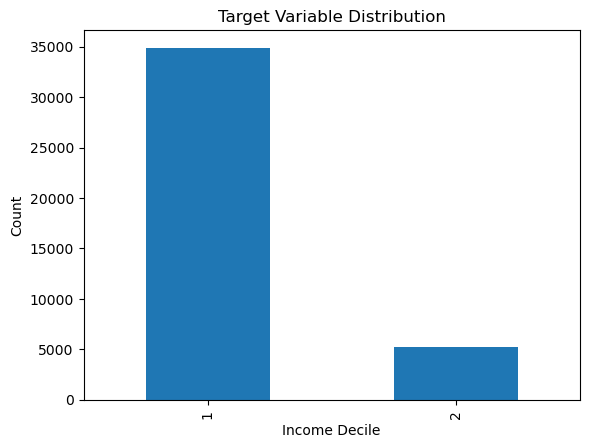

In [26]:
incexp_df['ELECTRIC'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Income Decile')
plt.ylabel('Count')
plt.show()

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Checking class distribution before balancing
print("Class distribution before balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Splitting features and target variable
X = incexp_df.drop('ELECTRIC', axis=1)  # Drop the target column
y = incexp_df['ELECTRIC']               # Target column

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine scaled features and target back into a single DataFrame
balanced_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Separate majority and minority classes
majority_class = balanced_df[balanced_df['ELECTRIC'] == 1]
minority_class = balanced_df[balanced_df['ELECTRIC'] == 2]

### OPTION 1: Undersample Majority Class ###
majority_undersampled = majority_class.sample(len(minority_class), random_state=42)
balanced_df = pd.concat([majority_undersampled, minority_class])

### OPTION 2: Oversample Minority Class ###
# minority_oversampled = resample(minority_class, 
#                                 replace=True,    # Sample with replacement
#                                 n_samples=len(majority_class), # Match majority class size
#                                 random_state=42)
# balanced_df = pd.concat([majority_class, minority_oversampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Update incexp_df with the balanced data
incexp_df = balanced_df

# Checking the new class distribution after balancing
print("\nClass distribution after balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Displaying a few rows of the updated DataFrame
print("\nSample of the balanced dataset:")
print(incexp_df.head())


Class distribution before balancing:
ELECTRIC
1    34886
2     5285
Name: count, dtype: int64

Class distribution after balancing:
ELECTRIC
1    5285
2    5285
Name: count, dtype: int64

Sample of the balanced dataset:
     W_REGN     W_OID    W_SHSN     W_HCN       URB      RSTR       PSU  \
0 -0.001658  1.439639  1.188432  2.166171 -1.270074  0.980626 -0.386650   
1 -0.918676 -1.180164  0.543100 -0.474453  0.787356  0.725012 -1.398083   
2 -0.168389 -0.791670 -0.102231 -0.462362  0.787356 -0.098632 -0.403210   
3 -0.085023  0.214580  1.188432 -0.445232 -1.270074  0.440997  0.493164   
4 -1.002041  0.565470 -1.392894 -0.516101  0.787356  0.497800 -0.513133   

    BWEIGHT     RFACT     FSIZE  ...  OVEN_QTY  MOTOR_BANCA_QTY  \
0  0.737873  0.166058  0.592873  ... -0.392104        -0.092333   
1 -1.017431 -1.015699 -1.686046  ... -0.392104        -0.092333   
2 -0.381133 -0.569728  0.364981  ... -0.392104        -0.092333   
3 -0.610273 -0.511914  2.643900  ... -0.392104        -0.09233

## Income Distribution
Using graphs, we display the income distribution of the dataset. This serves as a guide to see what is the trends with the values of the dataset as this could serve as a guide to what kind of machine learning algorithm we want to test using this dataset. [link text](https://)

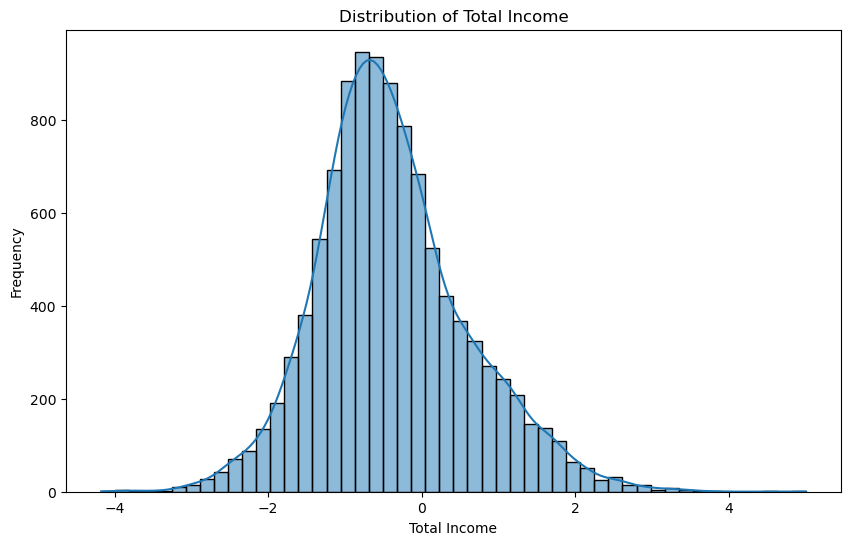

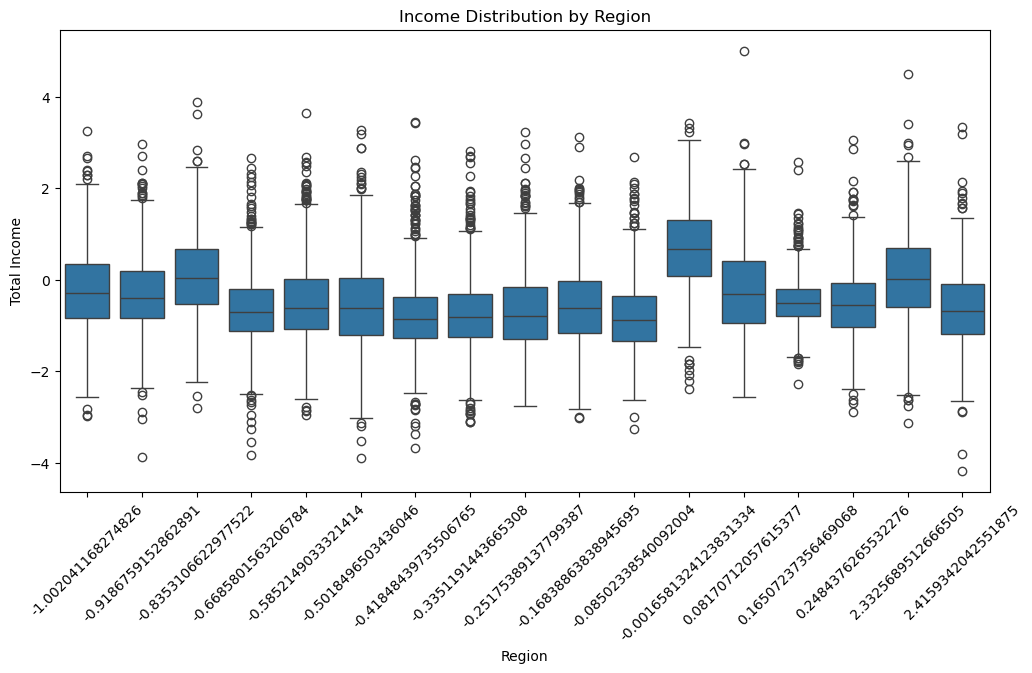

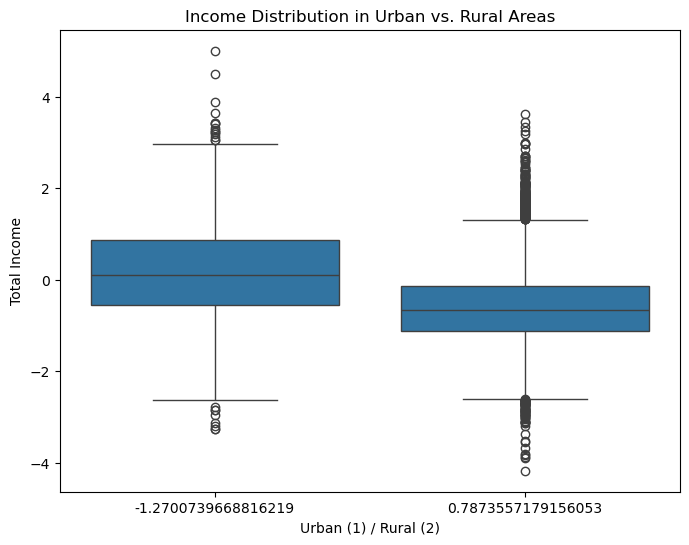

In [29]:
#Total Income Distribution
plt.figure(figsize=(10,6))
sns.histplot(incexp_df["TOINC"], bins=50, kde=True)
plt.title("Distribution of Total Income")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.show()

#Income across regions
plt.figure(figsize=(12,6))
sns.boxplot(x="W_REGN", y="TOINC", data=incexp_df)
plt.title("Income Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.show()

# Income distribution in Urban vs Rural areas
plt.figure(figsize=(8,6))
sns.boxplot(x="URB", y="TOINC", data=incexp_df)
plt.title("Income Distribution in Urban vs. Rural Areas")
plt.xlabel("Urban (1) / Rural (2)")
plt.ylabel("Total Income")
plt.show()


From the Total Income Distribution, we can see that there is an outlier after the normal distribution curve. The value of 500,000 for the Total Income has the most highest frequency, reaching at 3,000.

## Investigating Correlation between Features
In this section, we will investigate which features have a high correlation with each other. This is to determine which features should be used or removed depending on the data analysis we want to apply.

Here we test the correlation of the features `WAGES`, `AGRI_SAL`, `CASH_ABROAD`.

In [33]:
correlation_test = incexp_df[['WAGES','AGRI_SAL', 'CASH_ABROAD']]
correlation_test.corr()

,WAGES,AGRI_SAL,CASH_ABROAD
WAGES,1.000000,0.283271,-0.035675
AGRI_SAL,0.283271,1.000000,-0.124720
CASH_ABROAD,-0.035675,-0.124720,1.000000


Here, we can see that the correlation value between `WAGES` and `AGRI_SAL` is 0.010084, which is very close to 0, which means there's no significant correlation between these two features.

Same goes for `CASH_ABROAD` and `AGRI_SAL`, which results to a negative value closer to 0.

In [35]:
print(incexp_df['HHTYPE'])

0       -0.666176
1       -0.666176
2       -0.666176
3       -0.666176
4       -0.666176
           ...   
10565   -0.666176
10566    1.459566
10567    1.459566
10568   -0.666176
10569   -0.666176
Name: HHTYPE, Length: 10570, dtype: float64


In [36]:
correlation_test = incexp_df[['EAINC','TOINC', 'CASH_DOMESTIC', 'CASH_ABROAD', 'PCINC']]
correlation_test.corr()

,EAINC,TOINC,CASH_DOMESTIC,CASH_ABROAD,PCINC
EAINC,1.000000,-0.004508,-0.010971,-0.080238,-0.129662
TOINC,-0.004508,1.000000,-0.194477,0.368048,0.750048
CASH_DOMESTIC,-0.010971,-0.194477,1.000000,-0.096768,-0.253787
CASH_ABROAD,-0.080238,0.368048,-0.096768,1.000000,0.362257
PCINC,-0.129662,0.750048,-0.253787,0.362257,1.000000


In [37]:
correlation_test = incexp_df[['WAGES','PCINC']]
correlation_test.corr()

,WAGES,PCINC
WAGES,1.000000,0.090596
PCINC,0.090596,1.000000


In [38]:
correlation_test = incexp_df[['T_RENTVAL','T_ACTRENT', 'T_IMPUTED_RENT', 'T_BIMPUTED_RENT']]
correlation_test.corr()

,T_RENTVAL,T_ACTRENT,T_IMPUTED_RENT,T_BIMPUTED_RENT
T_RENTVAL,1.000000,0.242179,0.963472,0.027017
T_ACTRENT,0.242179,1.000000,-0.023155,-0.003762
T_IMPUTED_RENT,0.963472,-0.023155,1.000000,-0.014015
T_BIMPUTED_RENT,0.027017,-0.003762,-0.014015,1.000000


## Feature Importance


In [40]:
pd.set_option('display.max_rows', None)  
print(incexp_df.dtypes)

W_REGN                  float64
W_OID                   float64
W_SHSN                  float64
W_HCN                   float64
URB                     float64
RSTR                    float64
PSU                     float64
BWEIGHT                 float64
RFACT                   float64
FSIZE                   float64
AGRI_SAL                float64
NONAGRI_SAL             float64
WAGES                   float64
NETSHARE                float64
CASH_ABROAD             float64
CASH_DOMESTIC           float64
RENTALS_REC             float64
INTEREST                float64
PENSION                 float64
DIVIDENDS               float64
OTHER_SOURCE            float64
NET_RECEIPT             float64
REGFT                   float64
NET_CFG                 float64
NET_LPR                 float64
NET_FISH                float64
NET_FOR                 float64
NET_RET                 float64
NET_MFG                 float64
NET_COM                 float64
NET_TRANS               float64
NET_MIN 

In [41]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = incexp_df.drop(columns=['ELECTRIC'])  
y = incexp_df['ELECTRIC']

rf = RandomForestClassifier()
selector = RFE(rf, n_features_to_select=20, step=10)  # step=10 removes 10 features per iteration
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['W_OID', 'RFACT', 'NET_RECEIPT', 'TOINC', 'T_MEAT', 'T_SUGAR',
       'T_MINERAL', 'T_HOUSING_WATER', 'T_RENTVAL', 'T_COMMUNICATION',
       'T_MISCELLANEOUS', 'T_NFOOD', 'T_TOTEX', 'T_TOTDIS', 'TOILET', 'WATER',
       'TV_QTY', 'CD_QTY', 'REF_QTY', 'PCINC'],
      dtype='object')


Selected features: Index(['W_OID', 'RFACT', 'NET_RECEIPT', 'REGFT', 'T_MEAT', 'T_MILK', 'T_VEG',
       'T_SUGAR', 'T_HOUSING_WATER', 'T_RENTVAL', 'T_COMMUNICATION', 'T_NFOOD',
       'T_TOTEX', 'TOILET', 'WATER', 'DISTANCE', 'TV_QTY', 'CD_QTY',
       'CELLPHONE_QTY', 'PCINC'],
      dtype='object')

# Improving Model Performance

## Logistic Regression for Predicting if Household has Electricity

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = incexp_df[selected_features]  # Using the selected features from RFE
y = incexp_df['ELECTRIC']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]  # Ensure y_train matches the cleaned X_train
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test_clean)

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_clean)


LogisticRegression()

In [49]:
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test_clean, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_clean, y_pred))

Logistic Regression Accuracy: 0.8992
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.86      0.90      1068
           2       0.87      0.94      0.90      1046

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



In [50]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")  # Always predicts the majority class
dummy.fit(X_train_scaled, y_train_clean)
dummy_acc = dummy.score(X_test_scaled, y_test_clean)
print(f"Baseline Dummy Accuracy: {dummy_acc:.4f}")

Baseline Dummy Accuracy: 0.4948


## Linear Regression for Predicting Rent Value

In [52]:
rent_features = ['WAGES']
target = "PCINC"
rent_df = incexp_df[rent_features + [target]].dropna()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    rent_df[rent_features], rent_df[target], test_size=0.2, random_state=42
)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

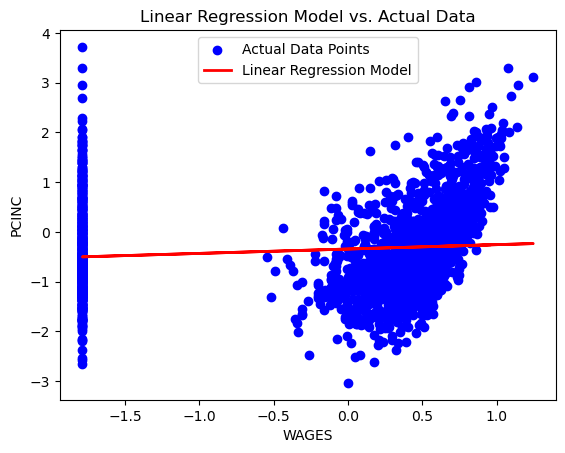

In [57]:
# prompt: Can you plot the  model and the data points

import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Model')
plt.xlabel(rent_features[0]) # Assuming only one feature for simplicity
plt.ylabel(target)
plt.title('Linear Regression Model vs. Actual Data')
plt.legend()
plt.show()


In [58]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.8664207422763447
R² Score: 0.008329776251637333


# Error Analysis

# Model Performance Summary

# Insights and Conclusions

# References

AI Tools were utilized for this work, namely ChatGPT and Deepseek.